# The limits of LDA

Here, we will explore the limitations of LDA and how some of them can be overcome. To this end, two datasets will be used


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Preprocess the features
Sometimes, some of the features clearly violate the __linear separability__ assumption made by LDA. Features can be pre-processed by applying a given function to each feature, which yields a Generalized Linear Discriminant analysis:

$$ y = \sum_i^D w_i f_i(\mathbf{x}_i) $$ 

__Task:__ Follow the steps (1) to (4) in the code below.

Accuracy:  0.72


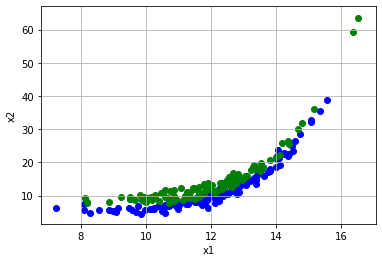

In [79]:
ds_data = 'data/non-lin_train.data'
ds_labels ='data/non-lin_train.labels'
X_train = np.loadtxt(ds_data)
y_train = np.loadtxt(ds_labels)

# 1-> Scatter-plot your 2D-data
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,3))
colors = ['red', 'green']
ax1.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],c=colors[0])
ax1.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],c=colors[1])
ax2.hist(X_train[y_train == 0, :], color=colors,label=['feat 0','feat 1'])
ax2.legend(prop={'size': 10})
ax3.hist(X_train[y_train == 1, :], color=colors,label=['feat 0','feat 1'])
ax3.legend(prop={'size': 10})
fig.show()

# (4) classify un-processed data
N = len(X_train)
m = np.mean(X_train,0)
cov0 = np.cov(X_train[y_train==0,:].T)
m0 = np.mean(X_train[y_train==0,:],0)
cov1 = np.cov(X_train[y_train==1,:].T)
m1 = np.mean(X_train[y_train==1,:],0)

w=0.5*np.dot(cov0+cov1,m1-m0)
b=-0.5*np.dot(w,m0+m1)

y_hat = b+np.dot(X_train,w)


%matplotlib inline
# (1) load data
ds_data = 'data/non-lin_train.data'
ds_labels ='data/non-lin_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)
n_samples = len(y)

# (2) split into training and validation
idx_all = np.arange(n_samples)
np.random.seed(1234)
np.random.shuffle(idx_all)
idx_tr = idx_all[:int(0.8*n_samples)]
idx_val = idx_all[int(0.8*n_samples):]
X_tr = X[idx_tr,:]
y_tr = y[idx_tr]
X_va = X[idx_val,:]
y_va = y[idx_val]


# (3) scatter-plot data with corresponding labels
idx_c1 = np.where(y_tr == 0)[0]
idx_c2 = np.where(y_tr == 1)[0]
plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
# (4) classify un-processed data
clf = LDA()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy:  %.2f'%score)




#### Q2.4.1) Which LDA assumption(s) are violated by the provided dataset?
THe distributions are not gaussian
#### Q2.4.2) In which way can the feature(s) be preprocessed in order to improve the performance? Hint: Think of polynomials, trigonometric functions, logarithms, exponential functions, etc.
Pre-processing with a non-lin func, here log.

Accuracy:  0.85


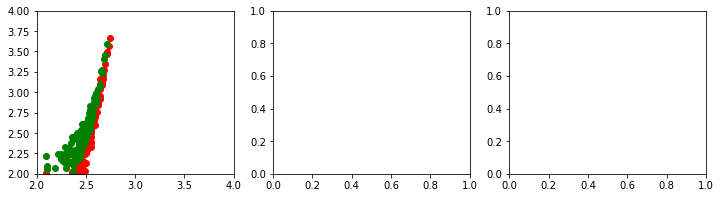

In [82]:
ds_data = 'data/non-lin_test.data'
X_test = np.loadtxt(ds_data)

# 2-> Preprocess your features
X_processed = np.log(X_tr)
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax1.scatter(X_processed[y_tr==0,0],X_processed[y_tr==0,1],c='r')
ax1.scatter(X_processed[y_tr==1,0],X_processed[y_tr==1,1],c='g')
ax1.set_xlim(2,4)
ax1.set_ylim(2,4)

X_pr0 = X_tr[y_tr==0,:]
X_pr1 = X_tr[y_tr==1,:]
# 3-> Check the performance of your LDA classifier
clf = LDA()
clf.fit(X_processed, y_tr)
score = clf.score(np.log(X_va), y_va)
print('Accuracy:  %.2f'%score)

# 4-> If you think you got it, upload your prediction accuracy to the wiki.
# 5 -> In addition, upload your implementation to GitLab under git_dir/Assignment2/Q2-4.ipynb

## Feature extraction
__Tasks:__ 
 1. Visualize the given toy 2D-dataset. 
 2. Train an LDA classifier on the given data. Remember to split your data set into training and validation set. Which performance do you achieve?


There appears to be some exploitable structure in your data, but the LDA is not able to directly capture this.

#### Q2.4.3) In which way can the existing features be combined in order to get a __linearly separable__ dataset? 

__Hint:__ Try to think of it in a 3D way: How would you add another dimension such that the 2 classes can be separated by a plane?

__Tasks__: 
1. Implement your additional feature that combines the existing features. 
2. Calculate the performance of LDA using this additional feature and see if you can improve upon the performance.

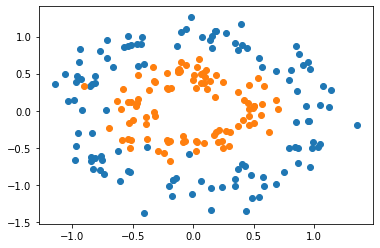

In [95]:
ds_data = 'data/circles_train.data'
ds_labels ='data/circles_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

# 0-> Split data
r = int(0.7*len(X))
X_tr = X[:r,:]
X_te = X[r:,:]
y_tr = y[:r]
y_te = y[r:]

# 1-> Scatter-plot your 2D-data.
plt.scatter(X_tr[y_tr==0,0],X_tr[y_tr==0,1])
plt.scatter(X_tr[y_tr==1,0],X_tr[y_tr==1,1])

# 2-> Combine the 2 existing features so a LDA classifier works



## What else can go wrong?

__Task:__ Visualize the data set.

#### Q2.4.4) What LDA assumption(s) are violated by the next dataset? What would be an optimal decision boundary? 
Here the cov matrices are not the same.

#### Q2.4.5 (Bonus): Investigate which method would provide an optimal decision boundary. 
SVM

__Hint:__ It is slightly a more general technique than LDA.

In [ ]:

ds_data = 'data/unbalanced_train.data'
ds_labels ='data/unbalanced_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

# 1-> Scatter-plot your 2D-data.
# 2-> What is the optimal decision boundary?